In [456]:
import pandas as pd
import numpy as np
import os


### Read the UN Comtrade data

The time range is that the trade data for most countries are updated till Sep 2023

In [457]:
# Specify the path to the folder containing CSV files
folder_path = '../data/raw/MonthlyTradeData_HS8542'

# Get a list of all files in the folder
files = [file for file in os.listdir(folder_path)]

# Create an empty list to store DataFrames
dfs = []

# Loop through each CSV file and read it into a DataFrame
for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, encoding='unicode_escape')
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame if needed
monthly_TradeData = pd.concat(dfs)

# Keep the necessary columns
monthly_TradeData = monthly_TradeData[['Period','ReporterISO','ReporterDesc','PartnerISO','PartnerDesc','PrimaryValue']]

# Convert the integer column to datetime format
monthly_TradeData['Period'] = pd.to_datetime(monthly_TradeData['Period'], format='%Y%m')

# # Filter the 'Period' when it is between 2010-01-01 and 2024-03-01
monthly_TradeData = monthly_TradeData[(monthly_TradeData['Period']>='2010-01-01') & (monthly_TradeData['Period']<='2023-08-01')]


In [458]:
# Specify the path to the folder containing CSV files
folder_path_TW = '../data/raw/8542_extra'

# Get a list of all files in the folder
files = [file for file in os.listdir(folder_path_TW)]

# Create an empty list to store DataFrames
dfs = []

# Loop through each CSV file and read it into a DataFrame
for file in files:
    file_path = os.path.join(folder_path_TW, file)
    df = pd.read_csv(file_path, encoding='unicode_escape')
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame if needed
monthly_TradeData_TW = pd.concat(dfs)

# Keep the necessary columns
monthly_TradeData_TW = monthly_TradeData_TW[['Period','ReporterISO','ReporterDesc','PartnerISO','PartnerDesc','PrimaryValue']]

# Convert the integer column to datetime format
monthly_TradeData_TW['Period'] = pd.to_datetime(monthly_TradeData_TW['Period'], format='%Y%m')

# # Filter the 'Period' when it is between 2010-01-01 and 2024-03-01
monthly_TradeData_TW = monthly_TradeData_TW[(monthly_TradeData_TW['Period']>='2010-01-01') & (monthly_TradeData_TW['Period']<='2023-08-01')]
# print(monthly_TradeData_TW['Period'].unique())

# Exchange the position of Reporter and Partner since we want to use the import data as an addition to export data of TW
monthly_TradeData_TW.rename(columns={
    'ReporterISO': 'PartnerISO_1','ReporterDesc': 'PartnerDesc_1','PartnerISO': 'ReporterISO_1','PartnerDesc': 'ReporterDesc_1'
}, inplace=True)
monthly_TradeData_TW.rename(columns={
    'ReporterISO_1': 'ReporterISO','ReporterDesc_1': 'ReporterDesc','PartnerISO_1': 'PartnerISO','PartnerDesc_1': 'PartnerDesc'
}, inplace=True)

# Extract the needed columns
monthly_TradeData_TW = monthly_TradeData_TW[['Period','ReporterISO','ReporterDesc','PartnerISO','PartnerDesc','PrimaryValue']]


In [459]:
# Concatenate the two DataFrames into a single DataFrame
monthly_TradeData = pd.concat([monthly_TradeData, monthly_TradeData_TW])

monthly_TradeData #526741

,Period,ReporterISO,ReporterDesc,PartnerISO,PartnerDesc,PrimaryValue
0,2015-01-01,DZA,Algeria,W00,World,2.628566e+03
1,2015-01-01,DZA,Algeria,USA,USA,2.628566e+03
2,2015-01-01,AGO,Angola,W00,World,2.982590e+03
3,2015-01-01,AGO,Angola,FRA,France,4.950500e+02
4,2015-01-01,AGO,Angola,NAM,Namibia,2.426630e+03
...,...,...,...,...,...,...
982,2018-12-01,S19,"Other Asia, nes",EGY,Egypt,8.331526e+04
983,2018-12-01,S19,"Other Asia, nes",GBR,United Kingdom,8.721823e+06
984,2018-12-01,S19,"Other Asia, nes",TZA,United Rep. of Tanzania,2.768410e+05
985,2018-12-01,S19,"Other Asia, nes",USA,USA,3.439689e+08


In [460]:
import pandas as pd
import numpy as np

# Assuming the DataFrame monthly_TradeData is already created and loaded

# Function to strip leading and trailing spaces from string values
def strip_categorical(value):
    if isinstance(value, str):
        return value.strip()
    return value

def replace_and_delete_countries(df):
    # Apply the function to the entire DataFrame
    df = df.applymap(strip_categorical)
    
    # Replace "Other Asia, nes" (S19) to Taiwan, China (TWN)
    df['ReporterISO'] = df['ReporterISO'].replace('S19', 'TWN')
    df.loc[df['ReporterISO'] == 'TWN', 'ReporterDesc'] = 'Taiwan'
    
    df['PartnerISO'] = df['PartnerISO'].replace('S19', 'TWN')
    df.loc[df['PartnerISO'] == 'TWN', 'PartnerDesc'] = 'Taiwan'
    
    # Delete rows containing NaN
    df = df.dropna()
    
    # List of 193 ISO codes for UN members plus Taiwan
    to_keep = ["AFG", "ALB", "DZA", "AND", "AGO", "ATG", "ARG", "ARM", "AUS", "AUT", "AZE", "BHS", 
               "BHR", "BGD", "BRB", "BLR", "BEL", "BLZ", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", 
               "BRN", "BGR", "BFA", "BDI", "CPV", "KHM", "CMR", "CAN", "CAF", "TCD", "CHL", "CHN", 
               "COL", "COM", "COG", "COD", "CRI", "CIV", "HRV", "CUB", "CYP", "CZE", "DNK", "DJI", 
               "DMA", "DOM", "ECU", "EGY", "SLV", "GNQ", "ERI", "EST", "SWZ", "ETH", "FJI", "FIN", 
               "FRA", "GAB", "GMB", "GEO", "DEU", "GHA", "GRC", "GRD", "GTM", "GIN", "GNB", "GUY", 
               "HTI", "HND", "HUN", "ISL", "IND", "IDN", "IRN", "IRQ", "IRL", "ISR", "ITA", "JAM", 
               "JPN", "JOR", "KAZ", "KEN", "KIR", "KWT", "KGZ", "LAO", "LVA", "LBN", "LSO", "LBR", 
               "LBY", "LIE", "LTU", "LUX", "MDG", "MWI", "MYS", "MDV", "MLI", "MLT", "MHL", "MRT", 
               "MUS", "MEX", "FSM", "MDA", "MCO", "MNG", "MNE", "MAR", "MOZ", "MMR", "NAM", "NRU", 
               "NPL", "NLD", "NZL", "NIC", "NER", "NGA", "PRK", "MKD", "NOR", "OMN", "PAK", "PLW", 
               "PAN", "PNG", "PRY", "PER", "PHL", "POL", "PRT", "QAT", "ROU", "RUS", "RWA", 
               "KNA", "LCA", "VCT", "WSM", "SMR", "STP", "SAU", "SEN", "SRB", "SYC", "SLE", "SGP", 
               "SVK", "SVN", "SLB", "SOM", "ZAF", "KOR", "SSD", "ESP", "LKA", "SDN", "SUR", "SWE", 
               "CHE", "SYR", "TJK", "TZA", "THA", "TLS", "TGO", "TON", "TTO", "TUN", "TUR", "TKM", 
               "TUV", "UGA", "UKR", "ARE", "GBR", "USA", "URY", "UZB", "VUT", "VEN", "VNM", "YEM", 
               "ZMB", "ZWE", "TWN"]
    
    # Keep rows where ReporterISO and PartnerISO are in the list of countries to keep
    df = df[df['ReporterISO'].isin(to_keep) & df['PartnerISO'].isin(to_keep)]
    
    return df

# Keep the necessary columns
#monthly_TradeData = monthly_TradeData[['Period', 'ReporterISO', 'ReporterDesc', 'PartnerISO', 'PartnerDesc', 'PrimaryValue']]

# Apply the function on monthly_TradeData
monthly_TradeData = replace_and_delete_countries(monthly_TradeData) #decreased from 526741 to 479218


In [461]:
monthly_TradeData

,Period,ReporterISO,ReporterDesc,PartnerISO,PartnerDesc,PrimaryValue
1,2015-01-01,DZA,Algeria,USA,USA,2.628566e+03
3,2015-01-01,AGO,Angola,FRA,France,4.950500e+02
4,2015-01-01,AGO,Angola,NAM,Namibia,2.426630e+03
5,2015-01-01,AGO,Angola,USA,USA,6.091000e+01
7,2015-01-01,AZE,Azerbaijan,NLD,Netherlands,3.215760e+03
...,...,...,...,...,...,...
982,2018-12-01,TWN,Taiwan,EGY,Egypt,8.331526e+04
983,2018-12-01,TWN,Taiwan,GBR,United Kingdom,8.721823e+06
984,2018-12-01,TWN,Taiwan,TZA,United Rep. of Tanzania,2.768410e+05
985,2018-12-01,TWN,Taiwan,USA,USA,3.439689e+08


In [462]:
monthly_TradeData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460996 entries, 1 to 986
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Period        460996 non-null  datetime64[ns]
 1   ReporterISO   460996 non-null  object        
 2   ReporterDesc  460996 non-null  object        
 3   PartnerISO    460996 non-null  object        
 4   PartnerDesc   460996 non-null  object        
 5   PrimaryValue  460996 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 24.6+ MB


In [463]:
### To be deleted -- Used to prove that we should exclude records before 2010

# Find the first and last periods for each country in 'ReporterDesc'
first_appearance_reporter = monthly_TradeData.groupby('ReporterDesc')['Period'].min().reset_index()
first_appearance_reporter.rename(columns={'Period': 'FirstPeriodReporter'}, inplace=True)

last_appearance_reporter = monthly_TradeData.groupby('ReporterDesc')['Period'].max().reset_index()
last_appearance_reporter.rename(columns={'Period': 'LastPeriodReporter'}, inplace=True)

# Find the first and last periods for each country in 'PartnerDesc'
first_appearance_partner = monthly_TradeData.groupby('PartnerDesc')['Period'].min().reset_index()
first_appearance_partner.rename(columns={'Period': 'FirstPeriodPartner'}, inplace=True)

last_appearance_partner = monthly_TradeData.groupby('PartnerDesc')['Period'].max().reset_index()
last_appearance_partner.rename(columns={'Period': 'LastPeriodPartner'}, inplace=True)

# Merge the DataFrames to get a combined view
combined_appearance_reporter = pd.merge(first_appearance_reporter, last_appearance_reporter, on='ReporterDesc', how='outer')
combined_appearance_partner = pd.merge(first_appearance_partner, last_appearance_partner, on='PartnerDesc', how='outer')

# Combine both Reporter and Partner appearances into a single DataFrame
combined_appearance = pd.merge(combined_appearance_reporter, combined_appearance_partner, left_on='ReporterDesc', right_on='PartnerDesc', how='outer')

# Optionally, you may want to keep only the necessary columns and rename appropriately
combined_appearance = combined_appearance[['ReporterDesc', 'FirstPeriodReporter', 'LastPeriodReporter', 'PartnerDesc', 'FirstPeriodPartner', 'LastPeriodPartner']]

combined_appearance


,ReporterDesc,FirstPeriodReporter,LastPeriodReporter,PartnerDesc,FirstPeriodPartner,LastPeriodPartner
0,Albania,2012-03-01,2013-03-01,Albania,2010-01-01,2023-08-01
1,Algeria,2010-03-01,2017-03-01,Algeria,2010-01-01,2023-08-01
2,Andorra,2010-01-01,2023-08-01,Andorra,2010-01-01,2023-08-01
3,Angola,2015-01-01,2022-12-01,Angola,2010-01-01,2023-08-01
4,Antigua and Barbuda,2011-02-01,2019-08-01,Antigua and Barbuda,2010-01-01,2023-08-01
...,...,...,...,...,...,...
188,NaN,NaT,NaT,Tonga,2010-01-01,2023-05-01
189,NaN,NaT,NaT,Turkmenistan,2010-01-01,2023-08-01
190,NaN,NaT,NaT,Tuvalu,2012-08-01,2022-06-01
191,NaN,NaT,NaT,Vanuatu,2010-10-01,2023-08-01


In [464]:
# Get the number of unique periods
num_unique_periods = combined_appearance['LastPeriodReporter'].nunique()

# Get the count of each unique period
period_counts = combined_appearance['LastPeriodReporter'].value_counts()

period_counts

LastPeriodReporter
2023-08-01    77
2022-12-01    10
2023-07-01     6
2019-12-01     4
2021-12-01     4
2022-11-01     3
2018-09-01     2
2023-06-01     2
2018-02-01     2
2020-03-01     2
2022-08-01     2
2020-12-01     2
2023-05-01     2
2023-04-01     2
2022-03-01     2
2016-10-01     1
2023-02-01     1
2012-02-01     1
2022-04-01     1
2017-09-01     1
2022-02-01     1
2020-04-01     1
2020-10-01     1
2016-03-01     1
2013-03-01     1
2017-12-01     1
2021-09-01     1
2011-10-01     1
2022-09-01     1
2017-03-01     1
2022-01-01     1
2023-03-01     1
2011-09-01     1
2010-12-01     1
2013-11-01     1
2021-04-01     1
2019-08-01     1
2012-06-01     1
Name: count, dtype: int64

In [465]:
combined_appearance_after2010 = combined_appearance[combined_appearance['FirstPeriodReporter'] >= '2010-01-01']
combined_appearance_2010 = combined_appearance[combined_appearance['FirstPeriodReporter'] == '2010-01-01']


In [466]:
combined_appearance_after2010

,ReporterDesc,FirstPeriodReporter,LastPeriodReporter,PartnerDesc,FirstPeriodPartner,LastPeriodPartner
0,Albania,2012-03-01,2013-03-01,Albania,2010-01-01,2023-08-01
1,Algeria,2010-03-01,2017-03-01,Algeria,2010-01-01,2023-08-01
2,Andorra,2010-01-01,2023-08-01,Andorra,2010-01-01,2023-08-01
3,Angola,2015-01-01,2022-12-01,Angola,2010-01-01,2023-08-01
4,Antigua and Barbuda,2011-02-01,2019-08-01,Antigua and Barbuda,2010-01-01,2023-08-01
...,...,...,...,...,...,...
140,Uzbekistan,2019-01-01,2023-08-01,Uzbekistan,2010-01-01,2023-08-01
141,Viet Nam,2015-01-01,2022-12-01,Viet Nam,2010-01-01,2023-08-01
142,Yemen,2012-01-01,2012-06-01,Yemen,2010-01-01,2023-08-01
143,Zambia,2010-01-01,2023-04-01,Zambia,2010-01-01,2023-08-01


Pre-processing data

In [467]:
# # Scenario1: remove 60% small trade value 
# threshold = monthly_TradeData['PrimaryValue'].quantile(0.6)
# # print(threshold)
# 
# monthly_TradeData = monthly_TradeData[monthly_TradeData['PrimaryValue'] >= threshold]


In [468]:
# # Scenario2: remove records before 2012
# threshold = monthly_TradeData['PrimaryValue'].quantile(0.6)
# # print(threshold)
# 
# monthly_TradeData = monthly_TradeData[monthly_TradeData['PrimaryValue'] >= threshold]


Get the country list for all countries appeared in monthly_TradeData

In [469]:
def get_country_list(df):
    # Select only the necessary columns
    df = df[['ReporterISO', 'ReporterDesc', 'PartnerISO', 'PartnerDesc']]

    # Create a DataFrame for Reporter countries
    reporter_countries = df[['ReporterISO', 'ReporterDesc']].rename(columns={'ReporterISO': 'ISO', 'ReporterDesc': 'Country'})
    
    # Create a DataFrame for Partner countries
    partner_countries = df[['PartnerISO', 'PartnerDesc']].rename(columns={'PartnerISO': 'ISO', 'PartnerDesc': 'Country'})
    
    # Concatenate both DataFrames and drop duplicates
    countries = pd.concat([reporter_countries, partner_countries]).drop_duplicates().reset_index(drop=True)
    
    return countries

# Apply function
countries = get_country_list(monthly_TradeData)

print(countries.head())
print(countries.info())


   ISO     Country
0  DZA     Algeria
1  AGO      Angola
2  AZE  Azerbaijan
3  ARG   Argentina
4  AUS   Australia
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ISO      193 non-null    object
 1   Country  193 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB
None


In [470]:
countries

,ISO,Country
0,DZA,Algeria
1,AGO,Angola
2,AZE,Azerbaijan
3,ARG,Argentina
4,AUS,Australia
...,...,...
188,FSM,FS Micronesia
189,MHL,Marshall Isds
190,TON,Tonga
191,PLW,Palau


In [471]:
monthly_TradeData = monthly_TradeData[['Period','ReporterISO','PartnerISO','PrimaryValue']]

# Save to csv files
monthly_TradeData.to_csv('../data/processed/monthly_TradeData.csv', index=False, header=True)

### Get feature data

TPU -- Trade policy uncertainty index https://www.policyuncertainty.com/trade_cimpr.html

In [472]:
# Read data
tpu = pd.read_excel('../data/raw/tpu_web_latest.xlsx', sheet_name='TPU_MONTHLY', index_col=None)

# Select columns
tpu = tpu[['DATE','TPU']]

# Rename 'month' to 'period'
tpu = tpu.rename(columns={'DATE': 'Period'})

# Keep 'period' matches the format '2010M01'
tpu['Period'] = pd.to_datetime(tpu['Period'])

# Filter the 'period' when it is between 2010-01-01 and 2024-03-01
tpu = tpu[(tpu['Period'] >= '2010-01-01') & (tpu['Period'] <= '2024-03-01')]

In [473]:
tpu

,Period,TPU
600,2010-01-01,24.490808
601,2010-02-01,18.847337
602,2010-03-01,28.556673
603,2010-04-01,25.487728
604,2010-05-01,21.410693
...,...,...
766,2023-11-01,40.948276
767,2023-12-01,65.307307
768,2024-01-01,69.553994
769,2024-02-01,62.485712


In [474]:
tpu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 600 to 770
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Period  171 non-null    datetime64[ns]
 1   TPU     171 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


GPR -- Geopolitical Risk Index https://www.matteoiacoviello.com/gpr.htm

In [475]:
# Read data
gpr = pd.read_excel('../data/raw/data_gpr_export.xls', sheet_name='Sheet1', index_col=None)

# Rename 'month' to 'period'
gpr = gpr.rename(columns={'month': 'Period'})

# Keep 'period' matches the format '2000M01'
gpr['Period'] = pd.to_datetime(gpr['Period'])

# Filter the 'period' when it is between 2010-01-01 and 2024-03-01
gpr = gpr[(gpr['Period'] >= '2010-01-01') & (gpr['Period'] <= '2024-03-01')]

# don't keep country specific index
gpr = gpr[['Period', 'GPR']]

In [476]:
gpr

,Period,GPR
1320,2010-01-01,91.581024
1321,2010-02-01,80.725357
1322,2010-03-01,74.116943
1323,2010-04-01,88.761581
1324,2010-05-01,88.958710
...,...,...
1486,2023-11-01,156.487473
1487,2023-12-01,142.074020
1488,2024-01-01,159.757202
1489,2024-02-01,146.540665


In [477]:
gpr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 1320 to 1490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Period  171 non-null    datetime64[ns]
 1   GPR     171 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


GEM -- Global economic monitor index https://databank.worldbank.org/source/global-economic-monitor-(gem)#

In [478]:
# Read ata
gem = pd.read_excel('../data/raw/P_Data_Extract_From_Global_Economic_Monitor_(GEM)-2.xlsx', sheet_name='Data', 
index_col=None)
gem = gem.transpose().iloc[3:]

# Make the first row the columns
gem.columns = gem.iloc[0]
gem = gem[1:]

# Move the existing index to a regular column
gem.reset_index(inplace=True)

# Rename the column 'Series Code' to 'period'
gem = gem.rename(columns={'index': 'Period'})

# Keep only the part before the blank in the rows under column 'period'
gem['Period'] = gem['Period'].str.split().str[0]

# Convert the integer column to datetime format
gem['Period'] = pd.to_datetime(gem['Period'], format='%YM%m')

# Filter the 'period' when it is between 2010-01-01 and 2024-03-01
gem = gem[(gem['Period'] >= '2010-01-01') & (gem['Period'] <= '2024-03-01')]

# Replace '..' to NA
gem.replace('..', np.nan, inplace=True)

In [479]:
gem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 0 to 170
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Period         171 non-null    datetime64[ns]
 1   CORENS         0 non-null      float64       
 2   CORESA         91 non-null     float64       
 3   CPTOTSAXMZGY   171 non-null    float64       
 4   CPTOTSAXNZGY   0 non-null      float64       
 5   CPTOTSAXN      171 non-null    float64       
 6   CPTOTNSXN      171 non-null    float64       
 7   DPANUSSPB      145 non-null    float64       
 8   DPANUSSPF      0 non-null      float64       
 9   DXGSRMRCHNSKD  170 non-null    float64       
 10  DXGSRMRCHSAKD  171 non-null    float64       
 11  DXGSRMRCHNSCD  170 non-null    float64       
 12  DXGSRMRCHSACD  171 non-null    float64       
 13  DXGSRMRCHNSXD  170 non-null    float64       
 14  DXGSRMRCHSAXD  171 non-null    float64       
 15  NYGDPMKTPSAKN  0 non-null   

In [480]:
# drop columns with all NaN's
gem = gem.dropna(axis=1, how='all')

gem

Series Code,Period,CORESA,CPTOTSAXMZGY,CPTOTSAXN,CPTOTNSXN,DPANUSSPB,DXGSRMRCHNSKD,DXGSRMRCHSAKD,DXGSRMRCHNSCD,DXGSRMRCHSACD,...,DMGSRMRCHNSXD,DMGSRMRCHSAXD,IPTOTSAKD,IPTOTNSKD,IMPCOV,NEER,REER,RETSALESSA,TOTRESV,UNEMPSA_
0,2010-01-01,100.000000,2.583011,100.000000,100.000000,273.668678,8.964537e+05,9.661060e+05,1.419496e+06,1.094645e+06,...,2.563620,1.873958,1.279704e+12,1.279704e+12,4.880311,99.710300,99.882075,100.970001,8.795469e+06,8.266556
1,2010-02-01,100.116758,2.930774,100.147360,100.346163,275.136917,9.075080e+05,9.959764e+05,1.415809e+06,1.108186e+06,...,2.560877,1.853637,1.283712e+12,1.293828e+12,4.751241,100.058497,100.144656,101.121526,8.805293e+06,8.206897
2,2010-03-01,100.189116,3.300615,100.297261,100.652116,273.147971,1.049776e+06,1.005477e+06,1.587521e+06,1.128765e+06,...,2.402967,1.746825,1.300778e+12,1.436849e+12,4.882158,99.910024,99.868581,102.100177,8.882128e+06,8.188579
3,2010-04-01,100.262256,3.118235,100.477298,100.931581,271.460411,1.001864e+06,1.011137e+06,1.524225e+06,1.132969e+06,...,2.500254,1.762146,1.309634e+12,1.338720e+12,4.978065,99.826979,99.736114,95.659314,9.019701e+06,8.210219
4,2010-05-01,100.343875,3.285392,100.611906,101.050029,274.960784,1.011197e+06,1.020769e+06,1.524829e+06,1.118128e+06,...,2.480992,1.721536,1.319176e+12,1.347193e+12,5.057788,100.486460,100.390645,96.108964,8.974806e+06,8.116854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2023-11-01,NaN,3.879477,168.965061,169.400001,NaN,1.884629e+06,1.428173e+06,2.642135e+06,1.802256e+06,...,2.763071,1.666374,1.881066e+12,1.902165e+12,4.309817,103.409761,104.427667,100.680543,1.339346e+07,5.661176
167,2023-12-01,NaN,3.765619,169.945781,170.050553,NaN,1.821970e+06,1.396983e+06,2.542159e+06,1.774079e+06,...,2.728142,1.668721,1.887681e+12,1.861419e+12,4.549854,103.334684,103.834920,100.591706,1.368484e+07,5.670675
168,2024-01-01,NaN,3.440299,171.442191,171.668593,NaN,1.745226e+06,1.448087e+06,2.536527e+06,1.841863e+06,...,2.738092,1.663728,1.879627e+12,1.963133e+12,4.381012,103.657168,103.853338,101.811391,1.360344e+07,5.686735
169,2024-02-01,NaN,3.312444,172.794215,173.502014,NaN,1.748237e+06,1.469304e+06,2.392090e+06,1.847543e+06,...,2.675397,1.640823,1.890715e+12,1.971819e+12,4.278387,103.982254,104.100837,102.086548,1.357565e+07,5.709206


In [481]:
# Keep the columns
gem = gem[['Period','DMGSRMRCHSACD', 'IPTOTSAKD', 'IMPCOV', 'NEER', 'REER', 'RETSALESSA', 'TOTRESV', 'UNEMPSA_']] #Checked correlation with structure properties

gem

Series Code,Period,DMGSRMRCHSACD,IPTOTSAKD,IMPCOV,NEER,REER,RETSALESSA,TOTRESV,UNEMPSA_
0,2010-01-01,1.802235e+06,1.279704e+12,4.880311,99.710300,99.882075,100.970001,8.795469e+06,8.266556
1,2010-02-01,1.853262e+06,1.283712e+12,4.751241,100.058497,100.144656,101.121526,8.805293e+06,8.206897
2,2010-03-01,1.819304e+06,1.300778e+12,4.882158,99.910024,99.868581,102.100177,8.882128e+06,8.188579
3,2010-04-01,1.811889e+06,1.309634e+12,4.978065,99.826979,99.736114,95.659314,9.019701e+06,8.210219
4,2010-05-01,1.774453e+06,1.319176e+12,5.057788,100.486460,100.390645,96.108964,8.974806e+06,8.116854
...,...,...,...,...,...,...,...,...,...
166,2023-11-01,3.106750e+06,1.881066e+12,4.309817,103.409761,104.427667,100.680543,1.339346e+07,5.661176
167,2023-12-01,3.007755e+06,1.887681e+12,4.549854,103.334684,103.834920,100.591706,1.368484e+07,5.670675
168,2024-01-01,3.105054e+06,1.879627e+12,4.381012,103.657168,103.853338,101.811391,1.360344e+07,5.686735
169,2024-02-01,3.173076e+06,1.890715e+12,4.278387,103.982254,104.100837,102.086548,1.357565e+07,5.709206


In [482]:
gem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 0 to 170
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Period         171 non-null    datetime64[ns]
 1   DMGSRMRCHSACD  171 non-null    float64       
 2   IPTOTSAKD      171 non-null    float64       
 3   IMPCOV         171 non-null    float64       
 4   NEER           171 non-null    float64       
 5   REER           171 non-null    float64       
 6   RETSALESSA     171 non-null    float64       
 7   TOTRESV        171 non-null    float64       
 8   UNEMPSA_       171 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 13.4 KB


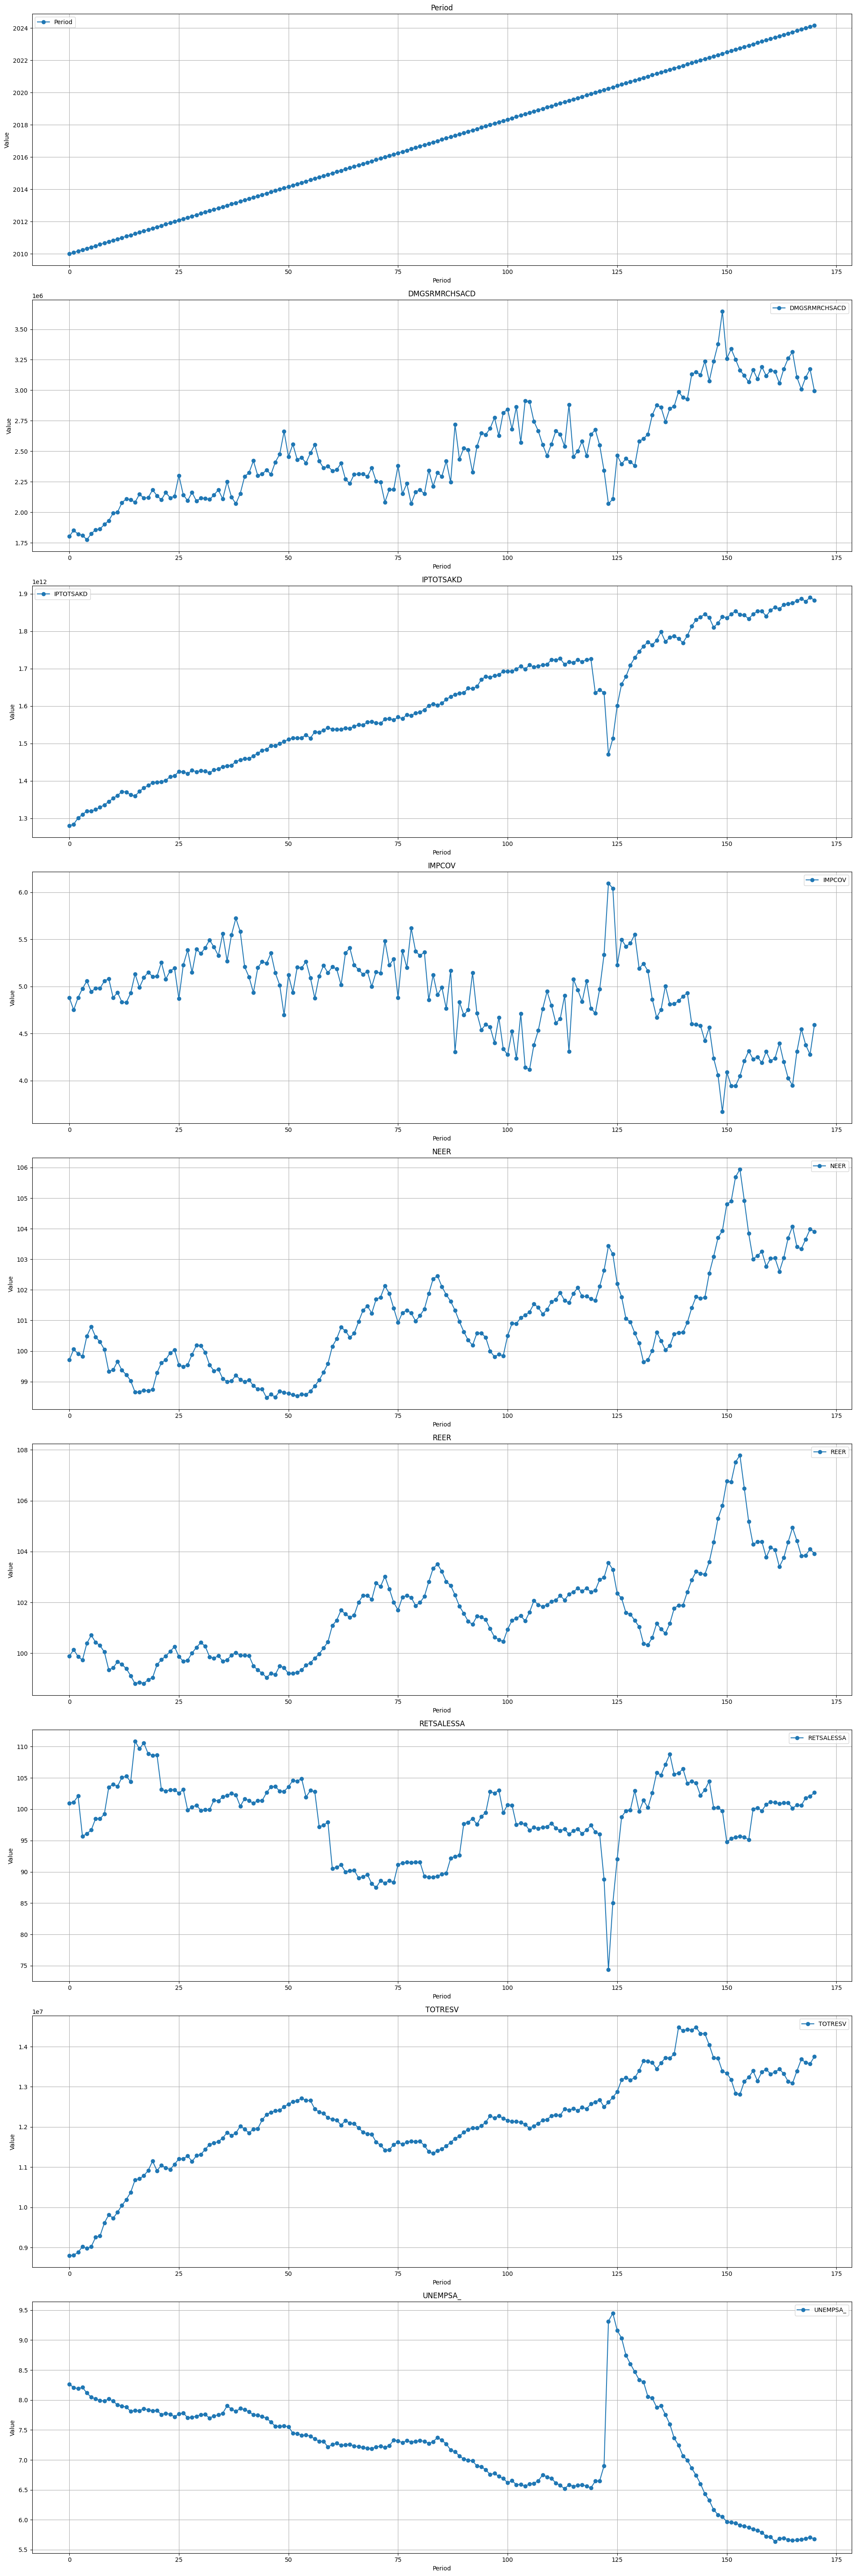

In [483]:
import pandas as pd
import matplotlib.pyplot as plt

# Set 'Period' as the index
#gem.set_index('Period', inplace=True)

# Plot each column
plt.figure(figsize=(20, 60))

for i, column in enumerate(gem.columns, start=1):
    plt.subplot(len(gem.columns), 1, i)
    plt.plot(gem.index, gem[column], marker='o', label=column)
    plt.title(column)
    plt.xlabel('Period')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


Construct feature matrix

### Global Economic Policy Uncertainty Index: Current Price Adjusted GDP

https://fred.stlouisfed.org/series/GEPUCURRENT
The Global Economic Policy Uncertainty Index is a GDP-weighted average of national EPU indices for 20 countries: Australia, Brazil, Canada, Chile, China, France, Germany, Greece, India, Ireland, Italy, Japan, Mexico, the Netherlands, Russia, South Korea, Spain, Sweden, the United Kingdom, and the United States..

For additional details, including an analysis of the performance of the model, see Baker, Scott, Nicholas Bloom and Steven Davis (2016), "Measuring Economic Policy Uncertainty"

Suggested Citation:
Baker, Scott R., Bloom, Nick and Davis, Stephen J., Global Economic Policy Uncertainty Index: Current Price Adjusted GDP [GEPUCURRENT], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GEPUCURRENT, July 30, 2024.

In [484]:
# Read data
GEPU = pd.read_csv('../data/raw/GEPUCURRENT.csv', encoding='unicode_escape')

# Rename columns
GEPU = GEPU.rename(columns={'DATE': 'Period','GEPUCURRENT':'GEPU'})

# Keep only Period  between 2000M01 and 2023M09
GEPU['Period'] = pd.to_datetime(GEPU['Period'])
GEPU = GEPU[(GEPU['Period'] >= '2010-01-01') & (GEPU['Period'] <= '2024-06-01')]


In [485]:
GEPU

,Period,GEPU
156,2010-01-01,113.055131
157,2010-02-01,111.376776
158,2010-03-01,107.563775
159,2010-04-01,103.827844
160,2010-05-01,146.925561
...,...,...
325,2024-02-01,197.369743
326,2024-03-01,177.022547
327,2024-04-01,185.979861
328,2024-05-01,203.211525


In [486]:
GEPU.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 156 to 329
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Period  174 non-null    datetime64[ns]
 1   GEPU    174 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


In [487]:
# Save to csv
GEPU.to_csv('../data/processed/ip.csv', index = False)

### Stock Price: Semiconductor ETF https://finance.yahoo.com/quote/SOXX/

In [488]:
# Semiconductor ETF https://finance.yahoo.com/quote/SOXX/
etf_price = pd.read_csv('../data/raw/SOXX.csv')

etf_price['Period'] = etf_price['Date']
etf_price['etf_price'] = etf_price['Adj Close']

# Keep only needed columns
etf_price = etf_price[['Period','etf_price']]

In [489]:

# Keep 'period' matches the format '2000M01'
etf_price['Period'] = pd.to_datetime(etf_price['Period'])

# Filter the 'period' when it is between 2010-01-01 and 2024-03-01
etf_price = etf_price[(etf_price['Period'] >= '2010-01-01') & (etf_price['Period'] <= '2024-03-01')]

# Save to csv files
etf_price.to_csv('../data/processed/etf_price.csv', index=False, header=True)

In [490]:
etf_price

,Period,etf_price
101,2010-01-01,12.225553
102,2010-02-01,13.201204
103,2010-03-01,14.057395
104,2010-04-01,14.341842
105,2010-05-01,13.403166
...,...,...
267,2023-11-01,170.488037
268,2023-12-01,191.216141
269,2024-01-01,194.902161
270,2024-02-01,216.865021


In [491]:
etf_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 101 to 271
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Period     171 non-null    datetime64[ns]
 1   etf_price  171 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


### GDP  of countries
https://databank.worldbank.org/source/world-development-indicators#

In [492]:
# Read ata
country_gdp = pd.read_excel('../data/raw/P_Data_Extract_From_World_Development_Indicators_GDP.xlsx', sheet_name='Data', 
index_col=None)

# merge countries in the network with the gdp and pop data
country_info = pd.merge(country_gdp, countries[['ISO']], how = 'right', on = 'ISO')

print(country_info.describe())

# Save to csv files
country_info.to_csv('../data/processed/countries.csv', index=False, header=True)

         Name  ISO GDP_2022 GDP_2023
count     192  193      192      192
unique    191  192      184      180
top     Sudan  SDN       ..       ..
freq        2    2        8       12


In [493]:
country_gdp

,Name,ISO,GDP_2022,GDP_2023
0,Afghanistan,AFG,14502158192.090395,..
1,Albania,ALB,18916378860.548828,22977677860.797855
2,Algeria,DZA,225560256621.757202,239899491127.742371
3,American Samoa,ASM,871000000,..
4,Andorra,AND,3380602042.842834,3727673593.019216
...,...,...,...,...
261,Sub-Saharan Africa,SSF,2061102939319.231201,2032749202553.059326
262,Sub-Saharan Africa (excluding high income),SSA,2059044970799.400635,2030607752381.920654
263,Sub-Saharan Africa (IDA & IBRD countries),TSS,2061102939319.231201,2032749202553.05957
264,Upper middle income,UMC,28567593041349.28125,29403677430761.246094


In [494]:
country_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      192 non-null    object
 1   ISO       193 non-null    object
 2   GDP_2022  192 non-null    object
 3   GDP_2023  192 non-null    object
dtypes: object(4)
memory usage: 6.2+ KB


In [495]:
# Sort by the count in descending order (optional)
country_info.to_excel('../data/processed/countries.xlsx', index=False)

Construct Feature Matrix

In [496]:
# Merge tpu, gpr, gem into the features data
merged_data = pd.merge(tpu, gpr, on='Period')
merged_data = pd.merge(merged_data, gem, on='Period')
features = pd.merge(merged_data, GEPU, on='Period') 
# features = pd.merge(merged_data, etf_price, on='Period') 

# save to csv
features.to_csv('../data/processed/features.csv', index=False)